In [1]:
# to do : insert cell above explaining how to download an RVS spectrum
# this can involve checking if the has_rvs flag is raised.
# note: you can download an RVS spectrum without an account
# so the instructions lets people download
# without needing to make an account
# I'll have to tell people to unzip the file and move it to the data directory.

# to do :
# document code
# re-arrange code since there are a number of things that are computed in 
# every function
# report label uncertainties?
# add table with binary properties?
# error message if table is not in .csv format?


In [2]:
from spectrum import *

# example spectrum for Kepler-409 (KOI-1925, KIC 9955598)
spectrum_path = './data/Kepler-409.csv'
spec = Spectrum(spectrum_path)

In [3]:
spec.data_table()

Teff (K),logg (dex),[Fe/H] (dex),[alpha/Fe] (dex),Vbroad (km/s),log$\chi^2$,log$\rho$,log$\chi_{\rm Ca}^2$,log$\Delta\chi^2$,SNR
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
5418.71,4.50,0.12,-0.01,4.59,3.31,-2.71,3.27,1.58,158.56


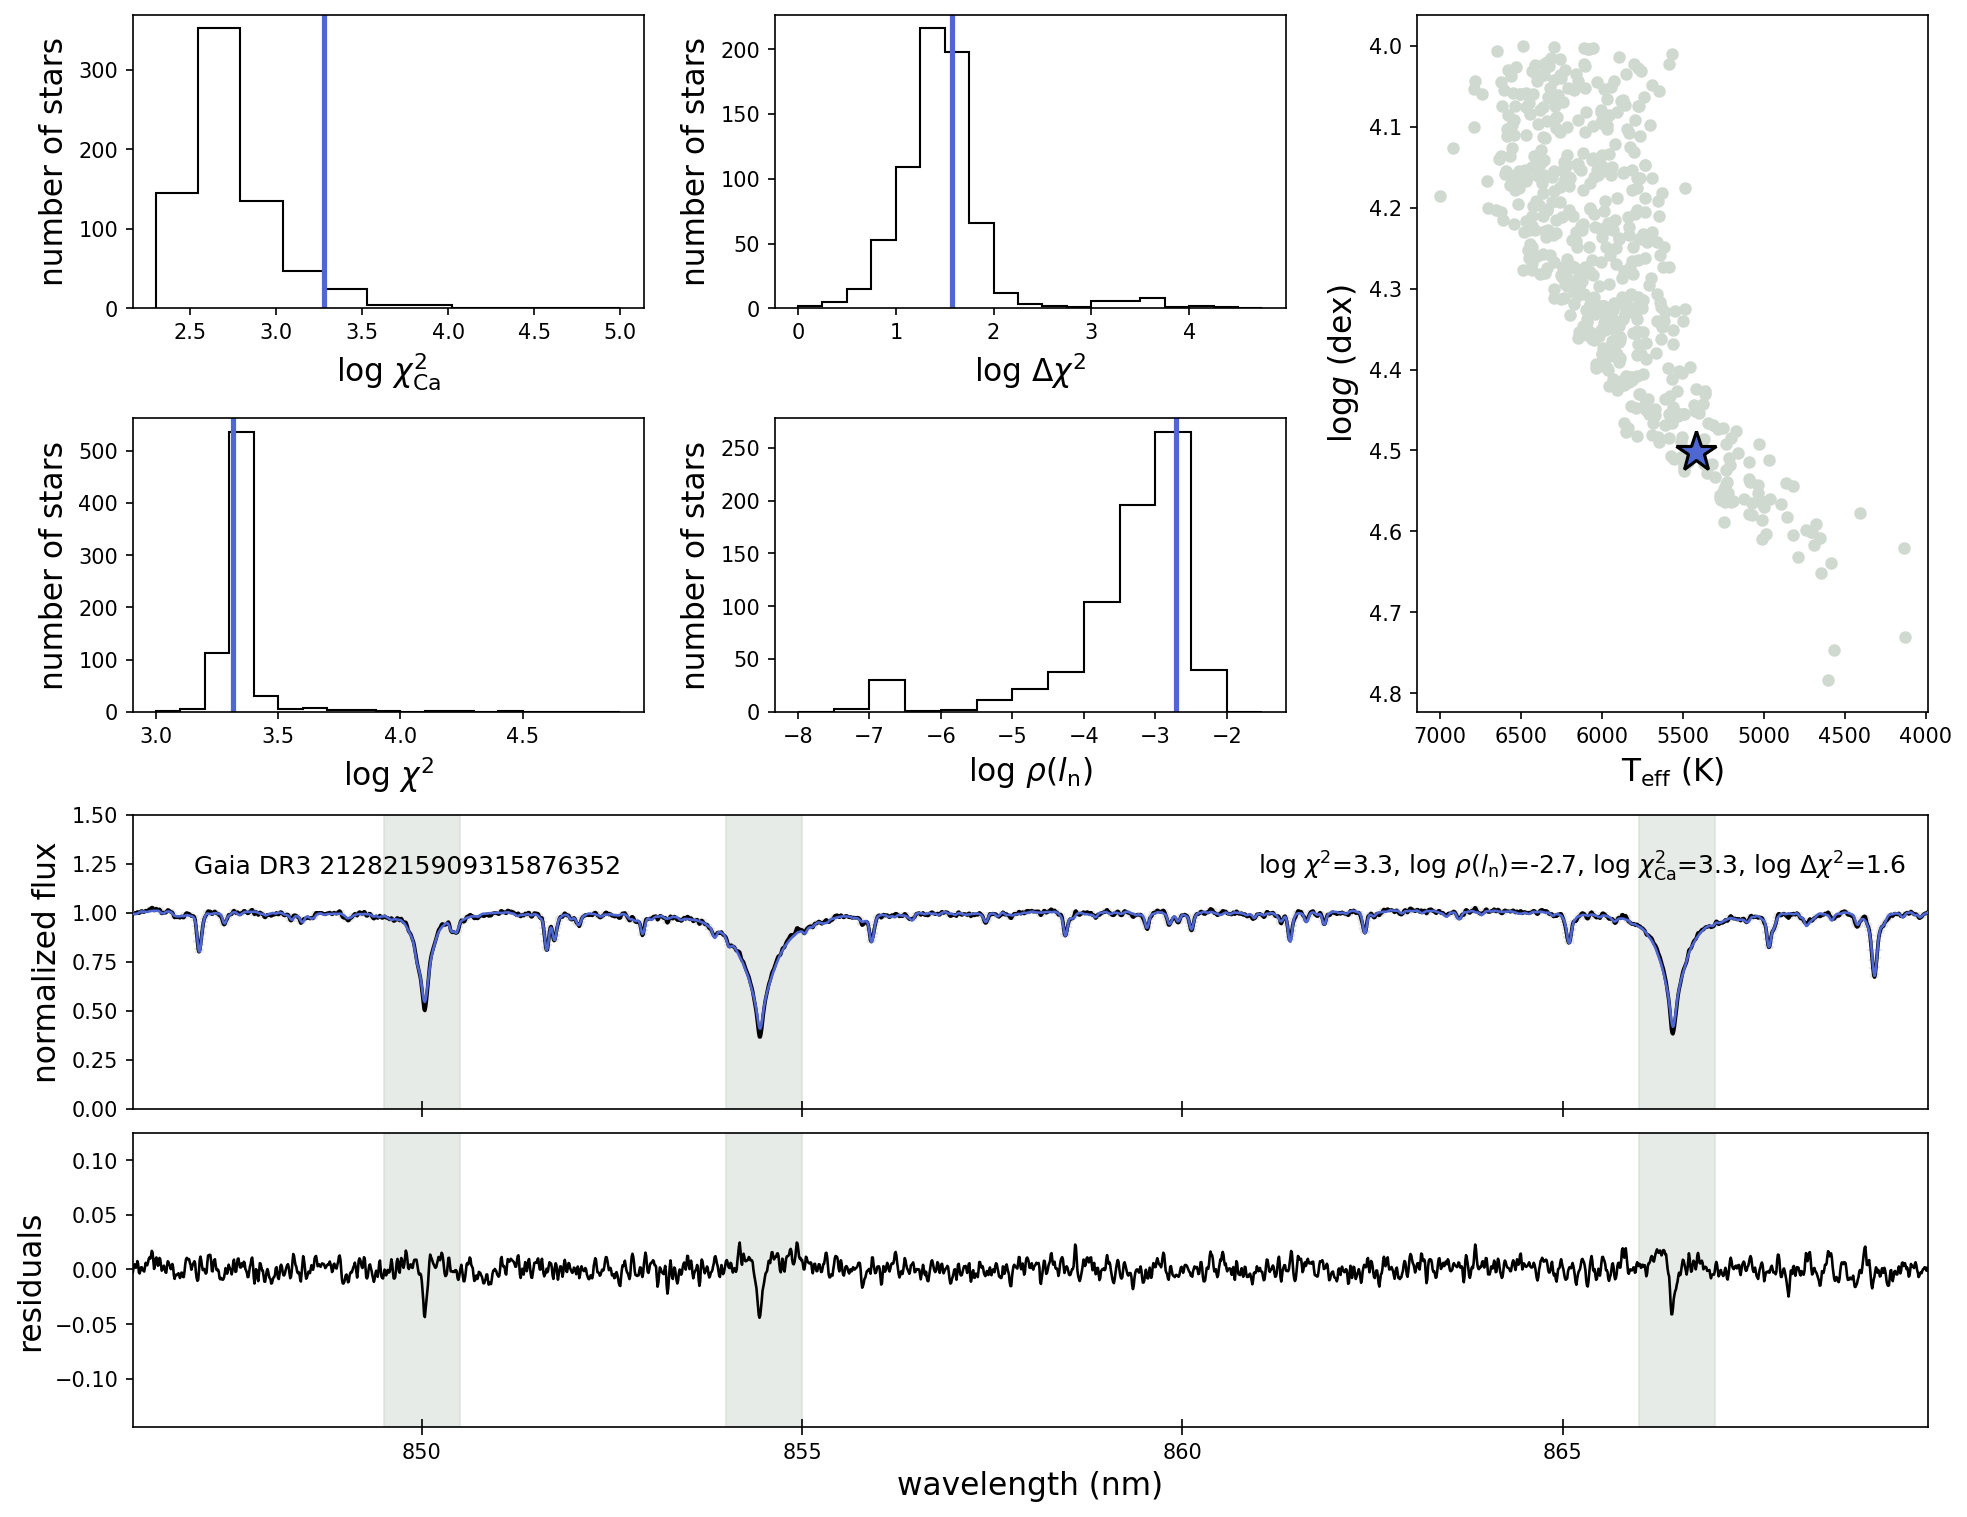

In [4]:
spec.spectrum_plot()

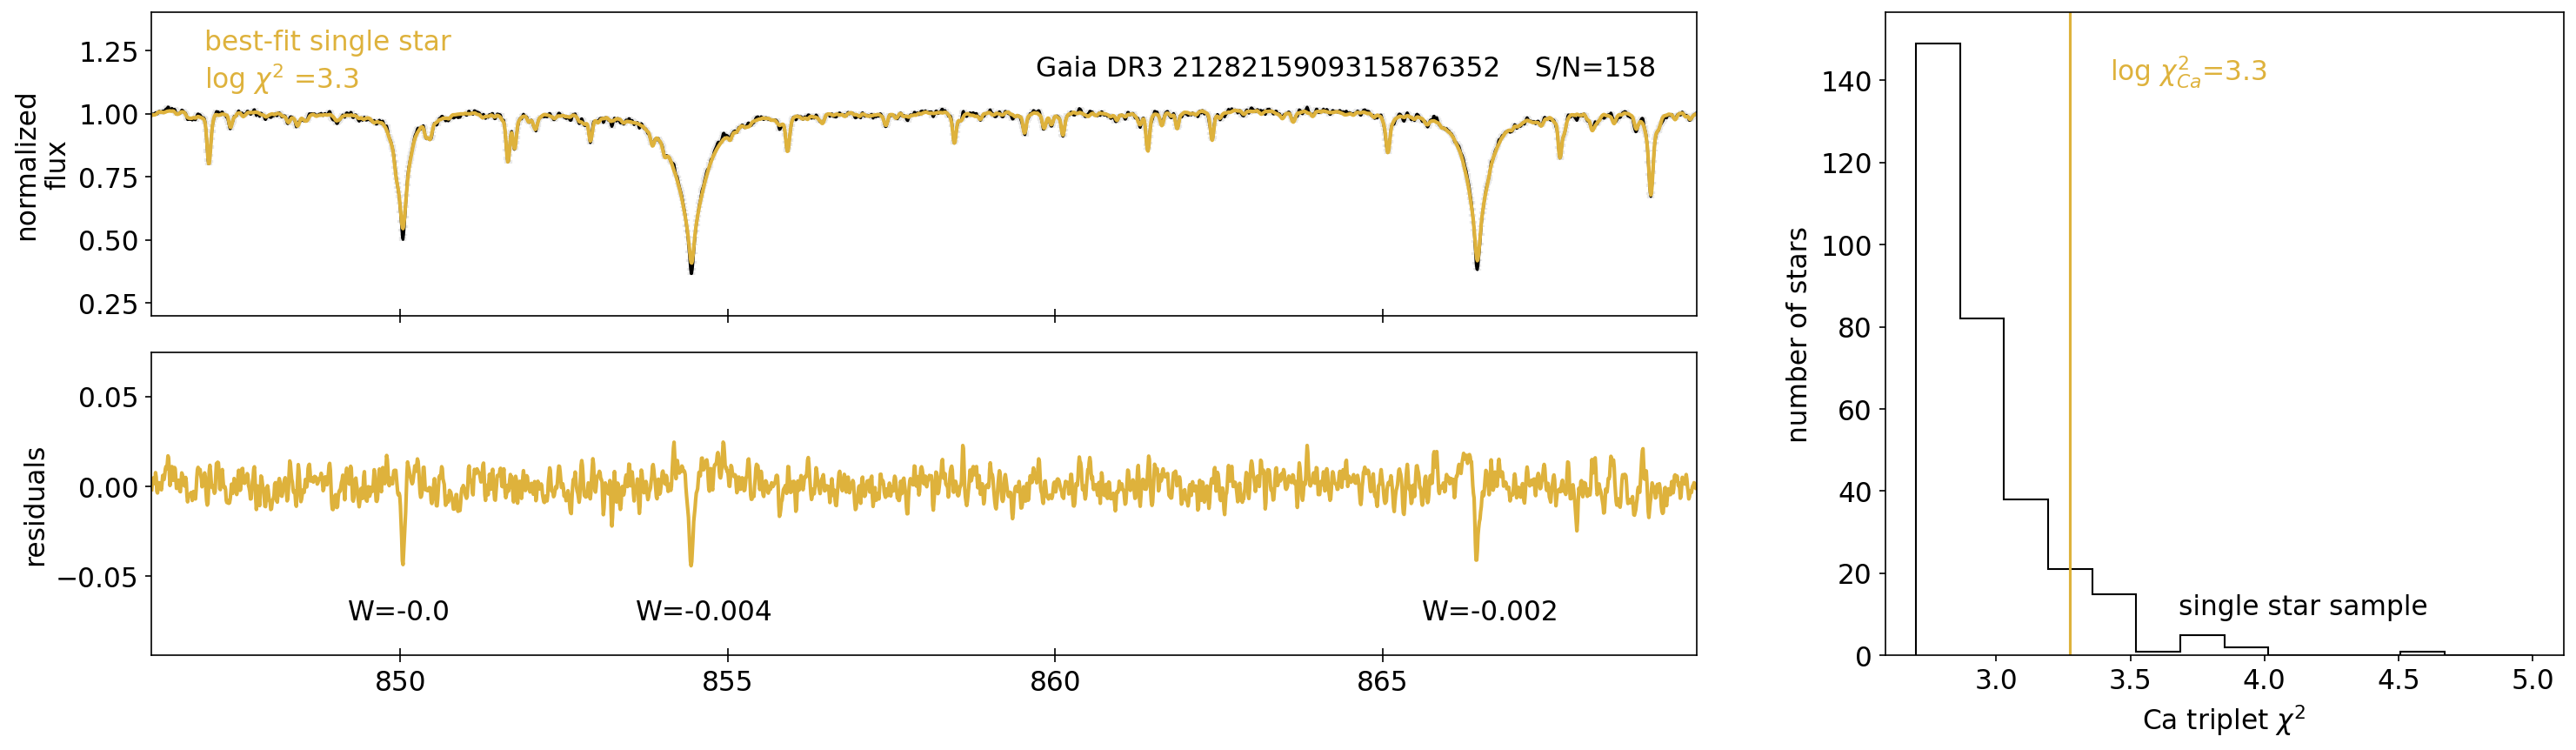

In [5]:
spec.activity_plot()

<Figure size 1950x1050 with 0 Axes>

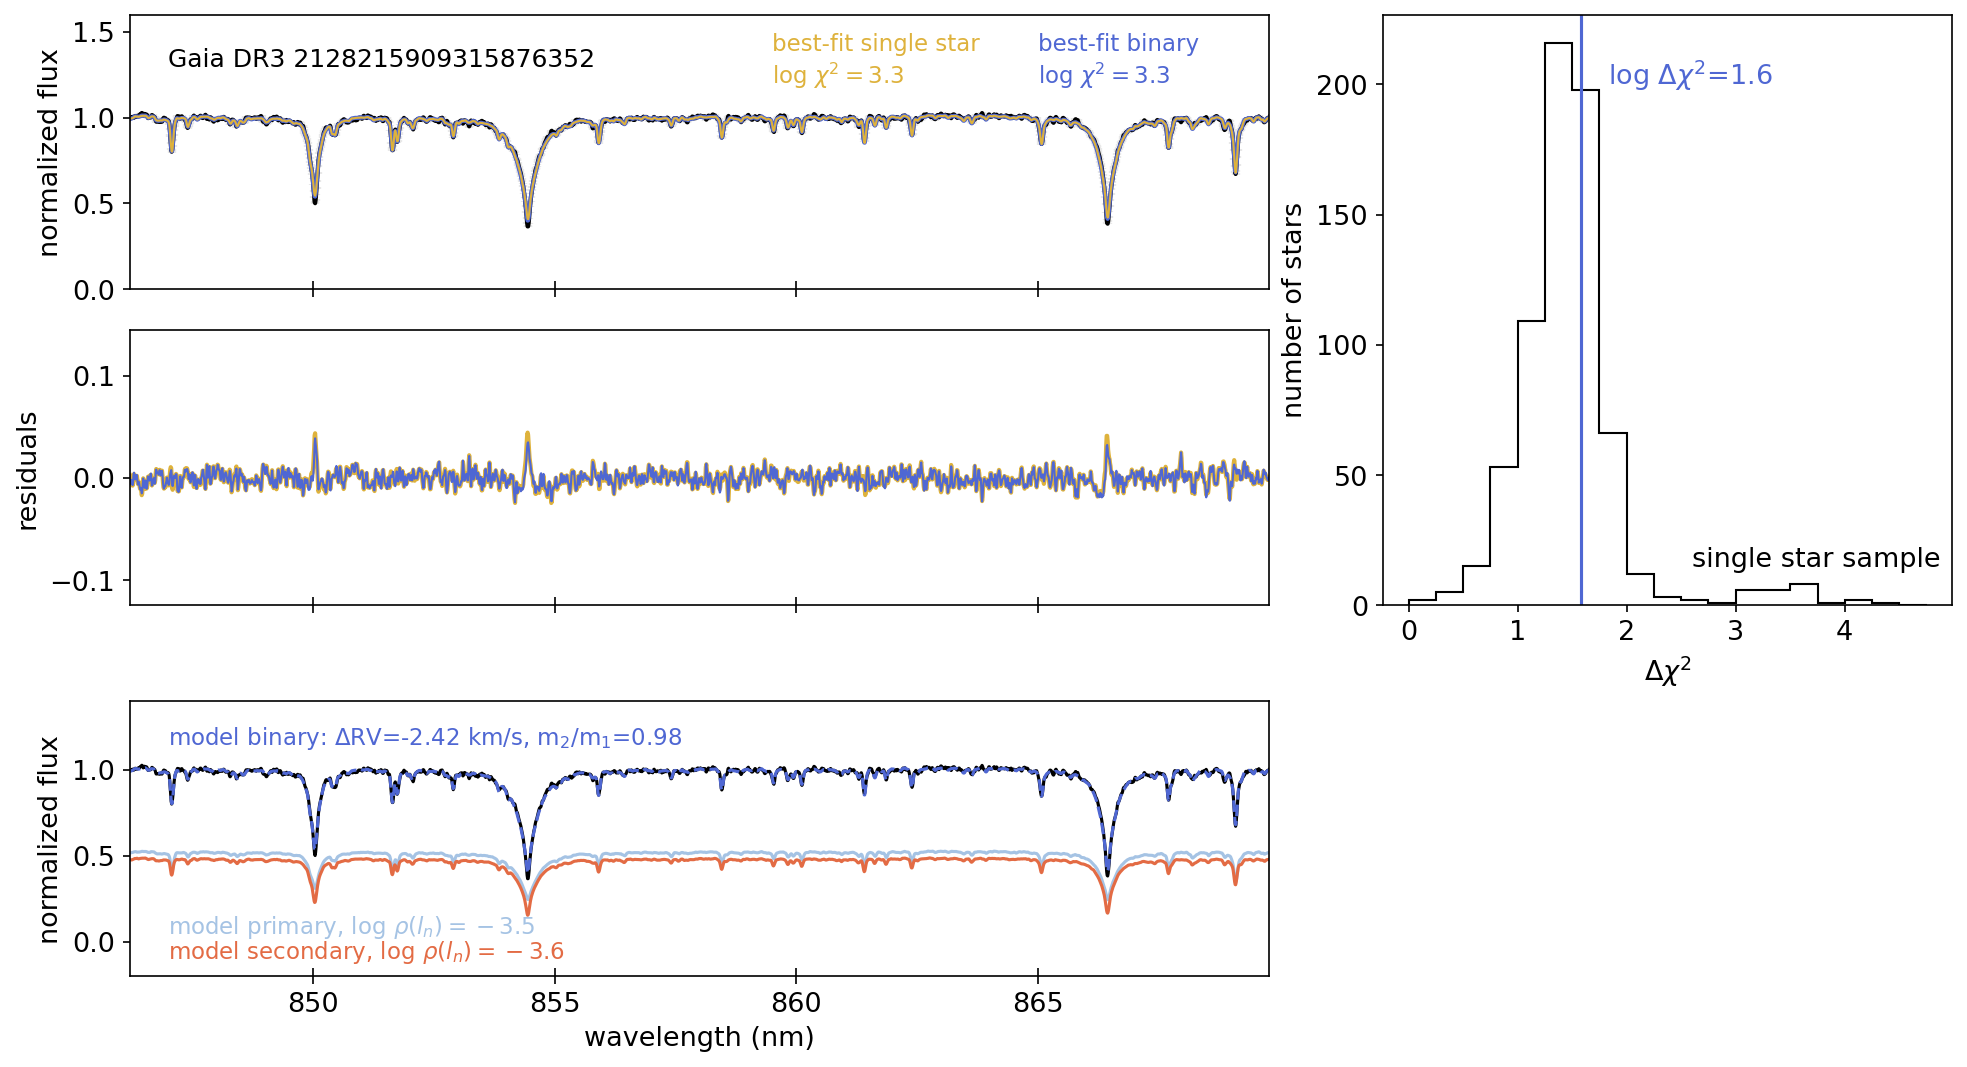

In [6]:
spec.binary_plot()

In [7]:
binary_spec = Spectrum('./data/GaiaDR3-1535964555128078720.csv')
binary_spec.data_table()

Teff (K),logg (dex),[Fe/H] (dex),[alpha/Fe] (dex),Vbroad (km/s),log$\chi^2$,log$\rho$,log$\chi_{\rm Ca}^2$,log$\Delta\chi^2$,SNR
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
5568.76,4.56,0.05,0.12,9.81,3.97,-7.00,3.00,3.84,90.18


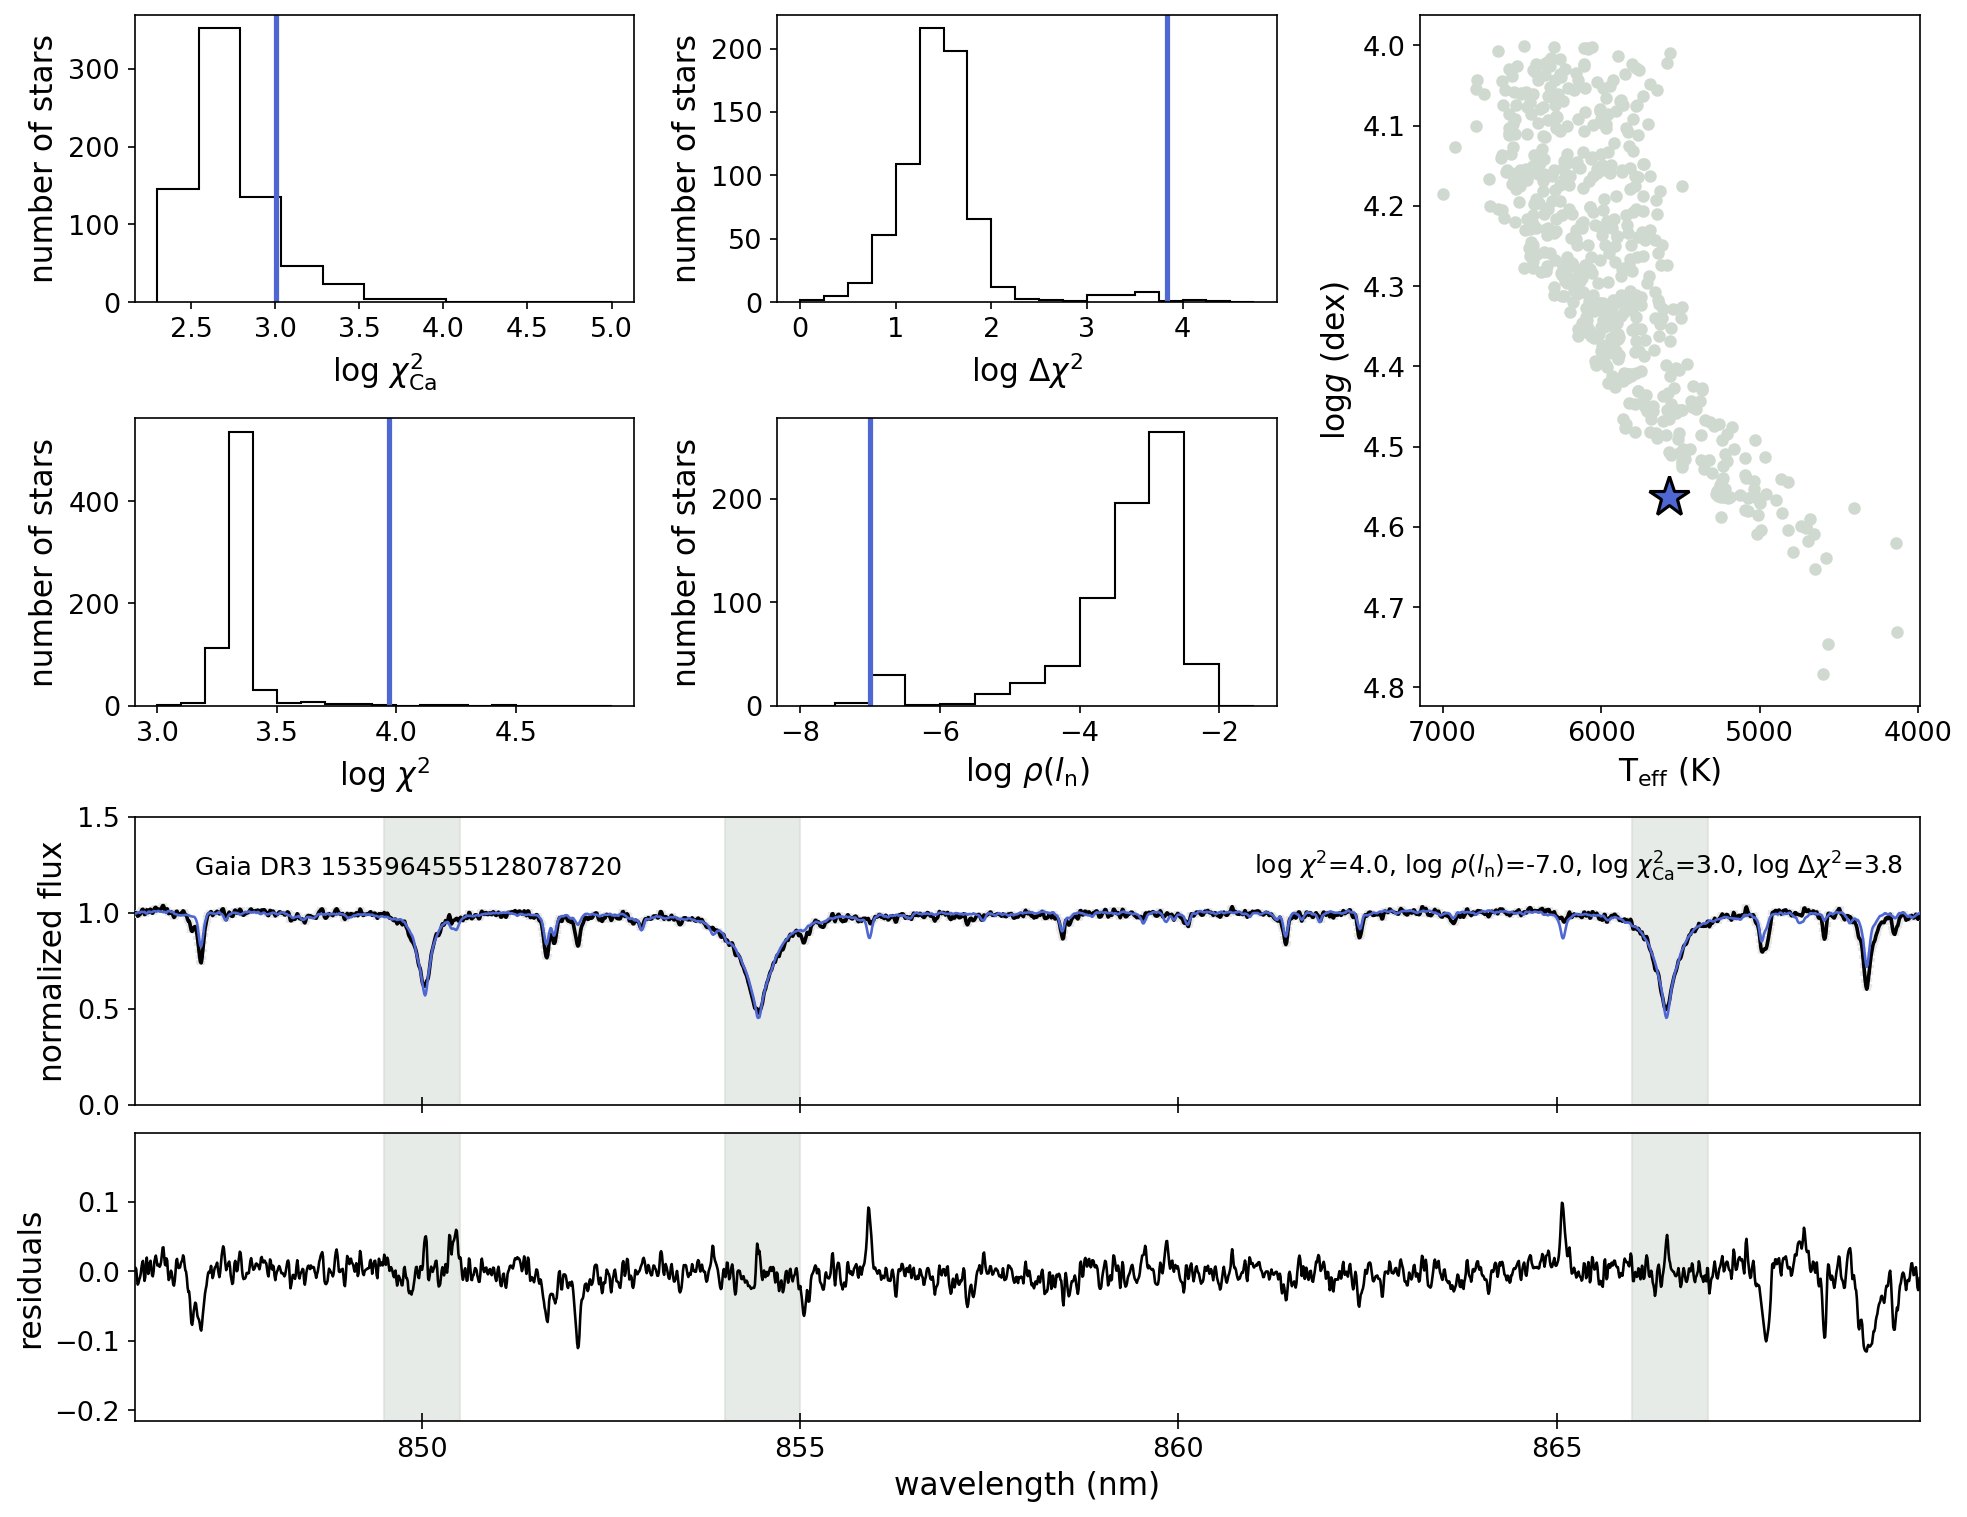

In [8]:
binary_spec.spectrum_plot()

<Figure size 1950x1050 with 0 Axes>

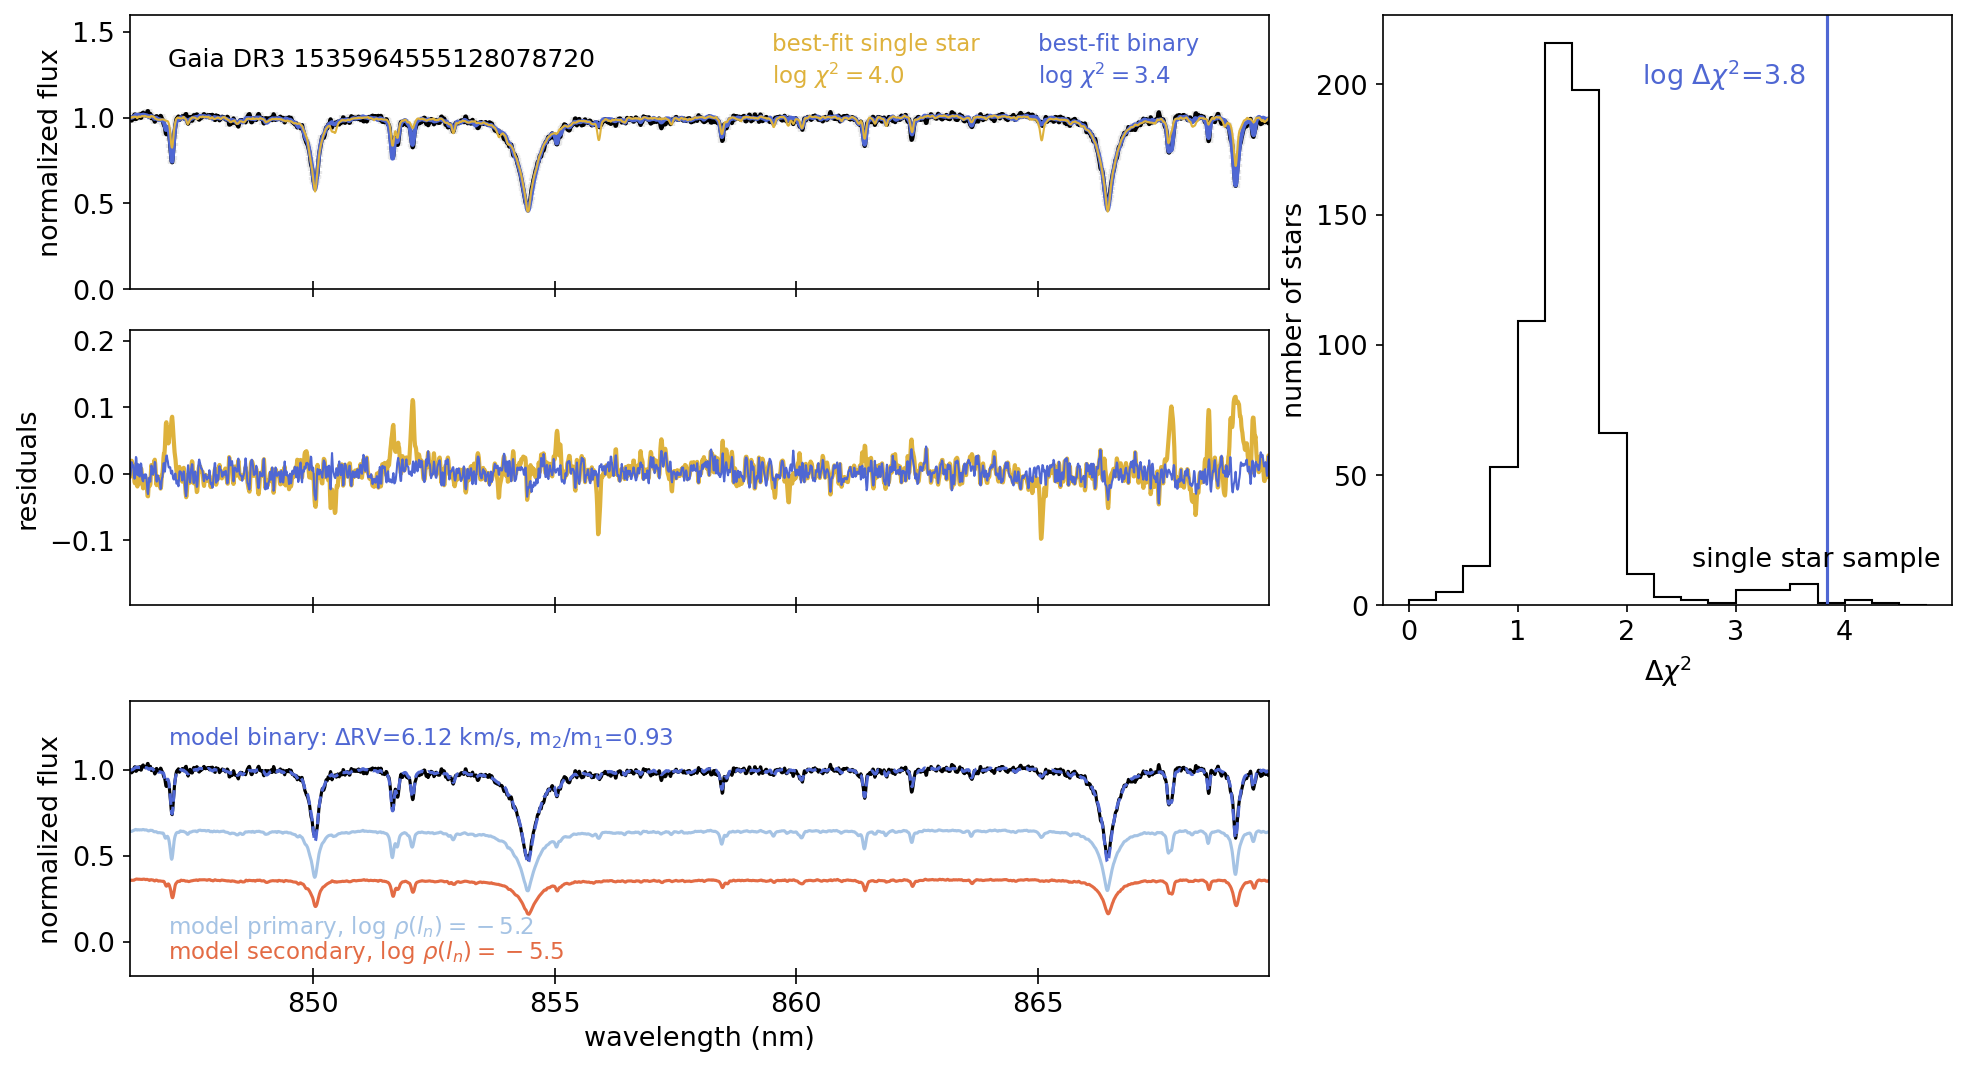

In [9]:
binary_spec.binary_plot()